In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import sys
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth',100)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_csv(r"C:\Users\nicka\OneDrive\Рабочий стол\all_data.csv",sep = ';',encoding = 'cp1251',index_col=0) #index_col=0 для того чтобы не было
df.sample(10)

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex
4881,Владис,real_estate_agent,https://vidnoye.cian.ru/sale/flat/285878185/,Москва_и_др.,sale,flat,5,9,1,27.1,219557,5950000,2016,19.0,3.1,79645672951,NaN,NaN,NaN,NaN
5892,ID 77676923,unknown,https://losino-petrovskiy.cian.ru/sale/flat/287212313/,Москва_и_др.,sale,flat,12,14,1,35.9,122534,4399000,2015,16.0,9.5,79670481439,NaN,NaN,NaN,NaN
7483,ЭТАЖИ Воскресенск,real_estate_agent,https://ramenskoye.cian.ru/sale/flat/287419120/,Москва_и_др.,sale,flat,10,15,1,27.1,158671,4300000,2019,-1.0,-1.0,79660482068,Северный,Семейная,NaN,Десятка
10563,ID 81237296,unknown,https://www.cian.ru/sale/flat/287457997/,Москва_и_др.,sale,flat,7,7,4,204.0,1100000,224400000,2021,-1.0,-1.0,79636087423,Пресненский,Большой Тишинский переулок,Улица 1905 года,Sinatra
6066,Реальная недвижимость,real_estate_agent,https://mytishchi.cian.ru/sale/flat/286813124/,Москва_и_др.,sale,flat,1,6,1,33.0,187878,6200000,2018,18.0,9.0,79663442825,NaN,NaN,NaN,NaN
2076,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/286912570/,Москва_и_др.,sale,flat,10,14,4,194.0,1185567,230000000,2012,-1.0,-1.0,79850449331,Замоскворечье,Мытная,Добрынинская,Английский квартал
8419,Homeapp,real_estate_agent,https://www.cian.ru/sale/flat/284894157/,Москва_и_др.,sale,flat,12,16,2,53.2,277255,14750000,2018,33.3,10.0,79660531406,Северный,Дмитровское шоссе,Селигерская,NaN
3232,Capital Mars,real_estate_agent,https://www.cian.ru/sale/flat/281953864/,Москва_и_др.,sale,flat,23,25,5,260.0,288461,75000000,2003,-1.0,8.0,79104775082,Пресненский,3-я Красногвардейская,Тестовская,Трианон
11109,МОСКВА СИТИ,real_estate_agent,https://www.cian.ru/sale/flat/279869544/,Москва_и_др.,sale,flat,30,78,2,67.0,600000,40200000,2020,-1.0,-1.0,79660517179,Пресненский,1-й Красногвардейский проезд,Выставочная,NEVA TOWERS
9548,ЕГСН Продажа,real_estate_agent,https://www.cian.ru/sale/flat/274277740/,Москва_и_др.,sale,flat,11,22,3,73.8,257452,19000000,1988,52.6,10.2,79653772511,Москворечье-Сабурово,Каширское шоссе,Москворечье,NaN


<Axes: >

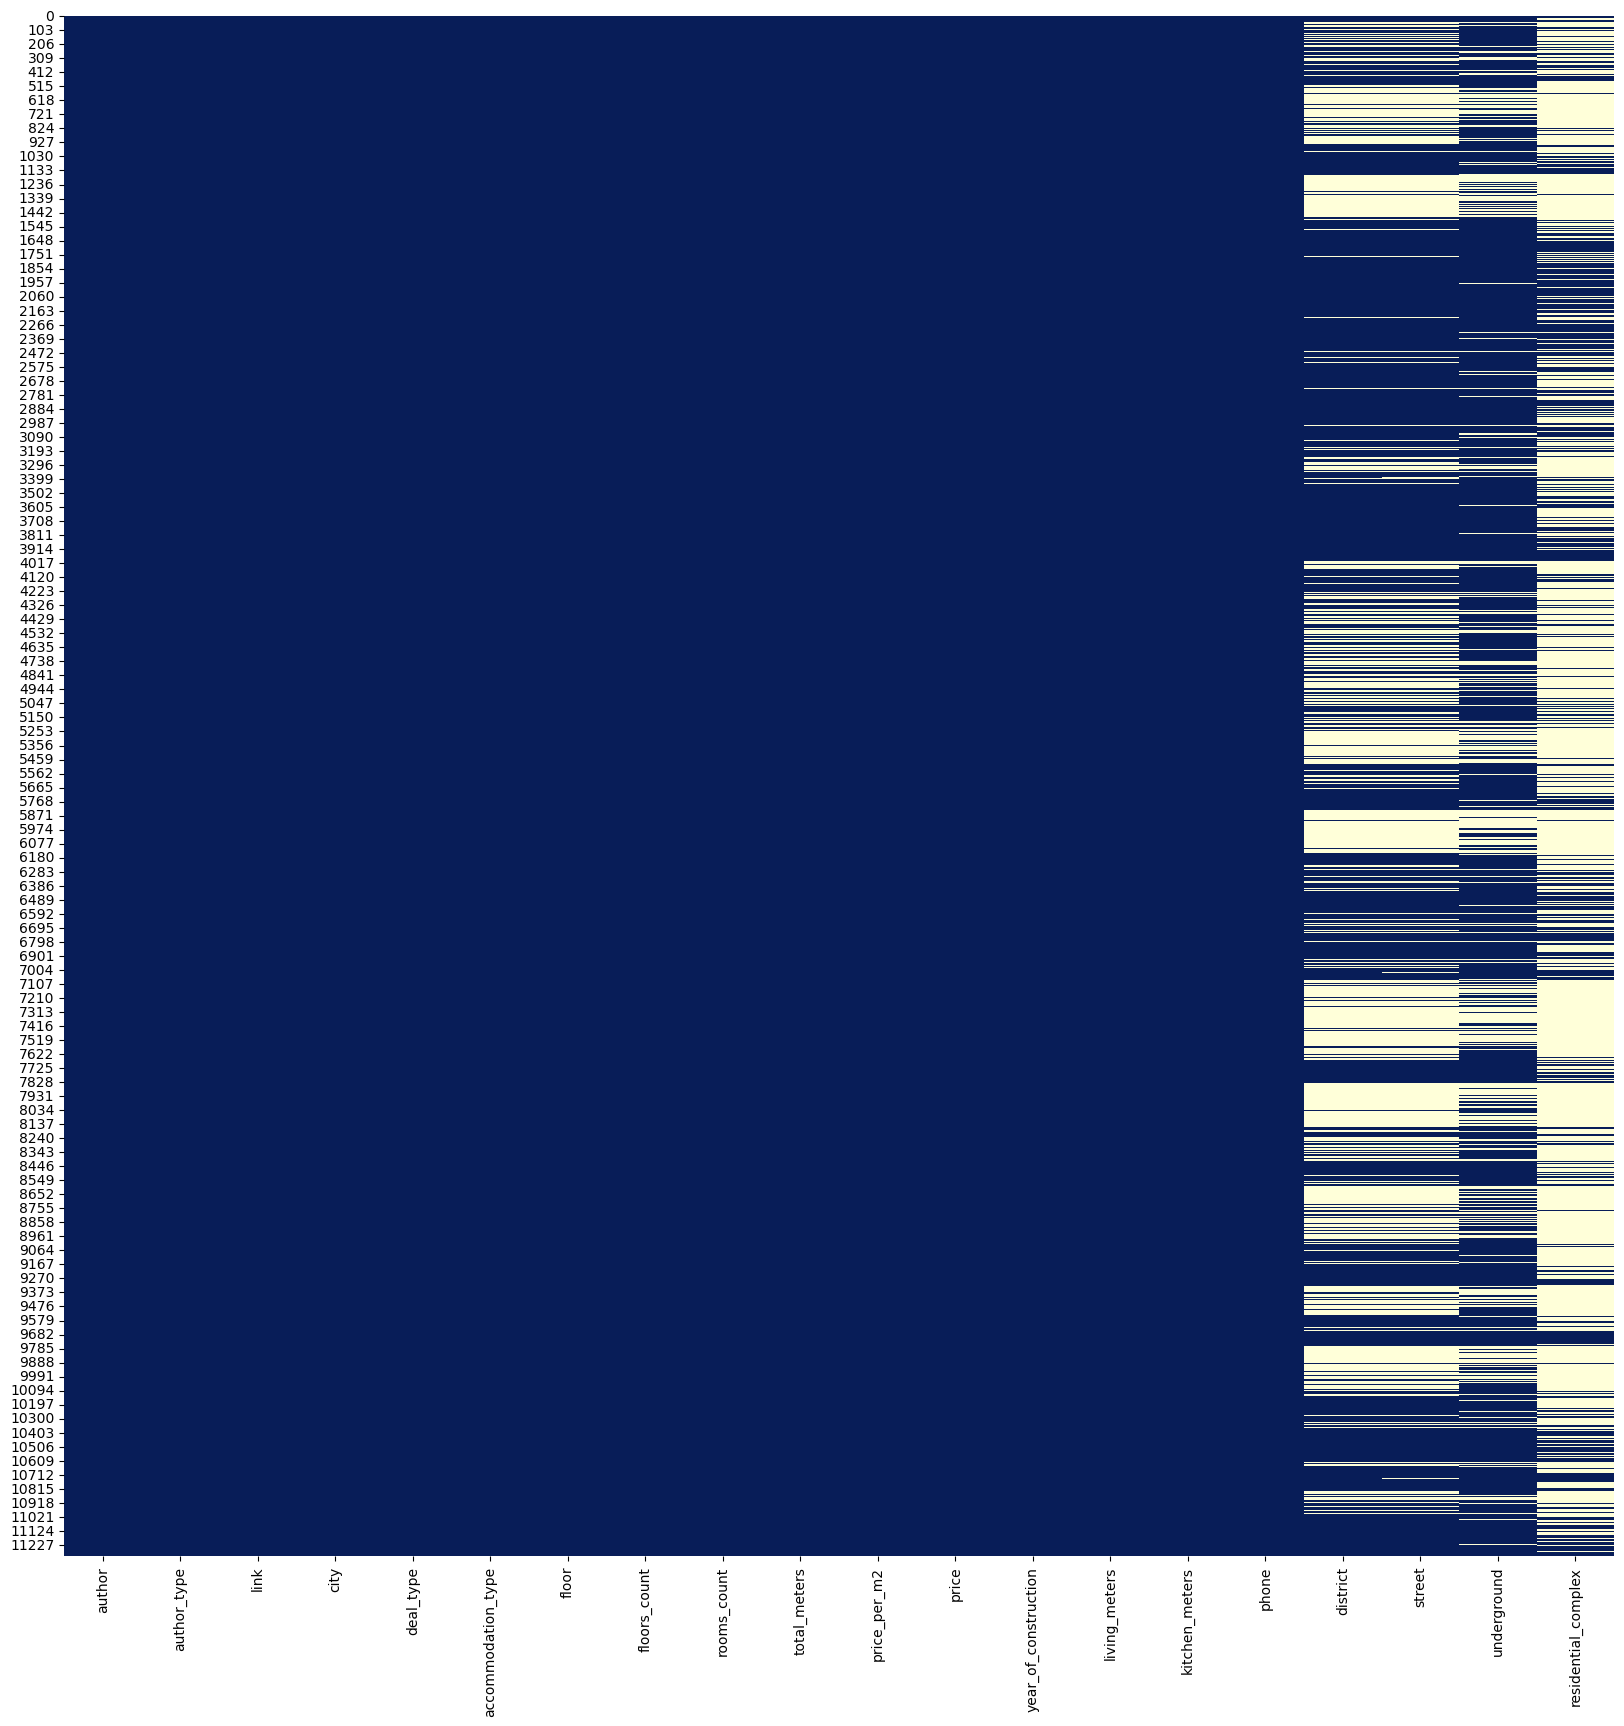

In [4]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [5]:
df.isna().sum()/df.shape[0]*100

author                   0.035367
author_type              0.035367
link                     0.000000
city                     0.000000
deal_type                0.000000
accommodation_type       0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
year_of_construction     0.000000
living_meters            0.000000
kitchen_meters           0.000000
phone                    0.000000
district                36.118479
street                  36.251105
underground             21.786030
residential_complex     67.559682
dtype: float64

In [6]:
df.head(100)

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex
0,Константин Кудрявцев,realtor,https://www.cian.ru/sale/flat/283849683/,Москва_и_др.,sale,flat,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,79660408670,Текстильщики,Шкулева,Волжская,NaN
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/280986757/,Москва_и_др.,sale,flat,17,41,1,40.40,618811,25000000,2021,15.2,9.1,79646331510,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк
2,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/286530258/,Москва_и_др.,sale,flat,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,79152007823,Хамовники,Усачева,Спортивная,Садовые кварталы
3,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/283638079/,Москва_и_др.,sale,flat,9,41,1,40.50,617283,25000000,2022,17.3,9.3,79646331510,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк
4,ID 44396977,realtor,https://www.cian.ru/sale/flat/287127196/,Москва_и_др.,sale,flat,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,79034356129,Нагатино-Садовники,Нагатинская набережная,Коломенская,NaN
5,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/285378586/,Москва_и_др.,sale,flat,6,13,1,71.10,983122,69900000,2019,37.1,12.8,79152007823,Хамовники,Усачева,Спортивная,Садовые кварталы
6,ИТКОЛ,official_representative,https://www.cian.ru/sale/flat/287529888/,Москва_и_др.,sale,flat,7,9,1,18.00,382000,6876000,-1,-1.0,-1.0,79651098418,Аэропорт,Большой Коптевский проезд,Красный Балтиец,NaN
7,Century 21 Premium Property,real_estate_agent,https://www.cian.ru/sale/flat/287489122/,Москва_и_др.,sale,flat,33,36,1,75.00,626666,47000000,2020,35.0,20.0,79175213146,Хорошево-Мневники,Шелепихинская набережная,Шелепиха,Сердце Столицы
8,СТРОЙИНВЕСТ,real_estate_agent,https://balashikha.cian.ru/sale/flat/281454196/,Москва_и_др.,sale,flat,9,17,1,37.20,147072,5471080,2022,-1.0,-1.0,79647297235,NaN,NaN,Лухмановская,NaN
9,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/286402225/,Москва_и_др.,sale,flat,6,41,1,41.00,724390,29700000,2022,24.0,6.0,79165694109,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк


In [7]:
df['link']

0        https://www.cian.ru/sale/flat/283849683/
1        https://www.cian.ru/sale/flat/280986757/
2        https://www.cian.ru/sale/flat/286530258/
3        https://www.cian.ru/sale/flat/283638079/
4        https://www.cian.ru/sale/flat/287127196/
                           ...                   
11305    https://www.cian.ru/sale/flat/287703757/
11306    https://www.cian.ru/sale/flat/284652097/
11307    https://www.cian.ru/sale/flat/284644852/
11308    https://www.cian.ru/sale/flat/285604501/
11309    https://www.cian.ru/sale/flat/282401854/
Name: link, Length: 11310, dtype: object

In [8]:
df.shape

(11310, 20)

In [9]:
df = df.drop_duplicates()
df.shape

(8391, 20)

In [10]:
df_cop = df.copy()

# Вычисление не нужных данных

### City

In [11]:
df_cop['city'].unique()

array(['Москва_и_др.'], dtype=object)

In [12]:
df_cop.drop(columns = 'city',inplace = True)

### Ссылка на квартиры нам не понадобиться кроме (!!!!!) того как если бы мы показывали похожие квартиры

In [13]:
df_cop.drop(columns = 'link',inplace = True)

### Deal_type

In [14]:
df_cop['deal_type'].unique()

array(['sale'], dtype=object)

In [15]:
df_cop.drop(columns = 'deal_type',inplace = True)

### Accommodation_type

In [16]:
df_cop['accommodation_type'].unique()

array(['flat'], dtype=object)

In [17]:
df_cop.drop(columns = 'accommodation_type',inplace = True)

### Телефон для нашей модели также не нужен т.к. это индивидуальная информация

In [18]:
df_cop.drop(columns = 'phone',inplace = True)

### Author и Author_type

In [19]:
df_cop.drop(columns = ['author','author_type'],inplace = True)

In [20]:
df_cop.sample(20)

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,residential_complex
10876,2,14,4,73.4,238419,17500000,1994,50.5,8.3,Лосиноостровский,Малыгина,Медведково,NaN
2787,11,18,5,204.7,810942,166000000,2022,124.0,22.0,Хамовники,Усачева,Спортивная,Садовые кварталы
7468,6,18,1,24.0,179166,4300000,2021,17.0,5.0,NaN,NaN,NaN,NaN
2221,8,21,4,103.0,966019,99500000,2019,-1.0,-1.0,Пресненский,Мантулинская,Выставочная,City Park
2677,5,6,5,225.0,1425182,320666000,2005,-1.0,-1.0,Пресненский,Скатертный переулок,Арбатская,NaN
613,3,5,1,36.4,153846,5600000,1983,19.0,10.0,NaN,NaN,Подольск,NaN
10630,7,14,4,80.5,208695,16800000,2022,50.4,11.9,NaN,NaN,Коммунарка,NaN
2559,11,14,4,160.0,175000,28000000,1999,94.0,20.0,Северное Измайлово,Щелковское шоссе,Щёлковская,NaN
3962,4,7,5,252.0,1717853,432899100,2003,135.0,26.0,Хамовники,Большой Левшинский переулок,Парк Культуры,Дворянское гнездо
4083,6,25,5,134.0,253731,34000000,2015,-1.0,12.0,NaN,NaN,Мякинино,NaN


Соединяем колонки с адресами и в общем местоположением т.к. в них большое количество пропусков, а информация в них весьма полезна для предсказаний нашей модели

In [21]:
df_cop['address'] = df_cop['district'].fillna('') + ' ' + df_cop['street'].fillna('') + ' ' + df_cop['underground'].fillna('') + \
                    ' ' + df_cop['residential_complex'].fillna('')

In [22]:
df_cop.sample(100)

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,residential_complex,address
4070,8,8,5,89.00,318539,28350000,1960,54.0,23.0,Алексеевский,Бориса Галушкина,ВДНХ,NaN,Алексеевский Бориса Галушкина ВДНХ
7431,2,18,1,29.00,144827,4200000,2022,20.0,5.0,NaN,NaN,NaN,NaN,
9686,4,12,3,70.00,464285,32500000,1965,-1.0,-1.0,Таганский,Земляной Вал,Чкаловская,NaN,Таганский Земляной Вал Чкаловская
661,7,7,1,42.70,59718,2550000,2009,18.7,9.7,NaN,NaN,Тимирязевская,NaN,Тимирязевская
9306,8,10,3,150.00,986666,148000000,2011,-1.0,-1.0,Замоскворечье,Большая Татарская,Новокузнецкая,Четыре солнца,Замоскворечье Большая Татарская Новокузнецкая Четыре солнца
111,14,14,1,42.40,168632,7150000,2009,20.0,9.0,Южное Бутово,Маршала Савицкого,Аннино,NaN,Южное Бутово Маршала Савицкого Аннино
8813,8,16,2,60.00,165833,9950000,2022,32.0,12.0,NaN,NaN,NaN,NaN,
2713,6,17,5,183.00,737650,134990000,2022,125.3,52.7,Пресненский,Звенигородское шоссе,Улица 1905 года,Дизайнерский дом Eleven,Пресненский Звенигородское шоссе Улица 1905 года Дизайнерский дом Eleven
2744,1,7,5,202.00,1980198,400000000,2015,-1.0,-1.0,Хамовники,Ефремова,Спортивная,Knightsbridge Private Park,Хамовники Ефремова Спортивная Knightsbridge Private Park
10840,1,10,4,90.10,105000,9460500,1998,-1.0,12.1,NaN,NaN,NaN,NaN,


In [23]:
df_cop[df_cop['address'] == '   ']

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,residential_complex,address
30,6,6,1,36.6,133879,4900000,-1,14.5,9.5,NaN,NaN,NaN,NaN,
44,12,17,1,37.1,142773,5296910,2022,13.8,11.9,NaN,NaN,NaN,NaN,
46,2,17,1,37.0,153062,5663320,2022,14.0,13.5,NaN,NaN,NaN,NaN,
51,10,26,1,39.0,243589,9500000,2017,18.0,12.0,NaN,NaN,NaN,NaN,
52,5,9,1,31.0,160967,4990000,2022,-1.0,-1.0,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,4,9,4,143.0,272727,39000000,2017,65.2,14.4,NaN,NaN,NaN,NaN,
10996,7,8,4,138.0,326086,45000000,2016,-1.0,-1.0,NaN,NaN,NaN,NaN,
11005,3,6,4,230.0,208695,48000000,-1,150.0,60.0,NaN,NaN,NaN,NaN,
11042,2,6,4,196.0,280612,55000000,-1,120.9,27.0,NaN,NaN,NaN,NaN,


In [24]:
df_cop.drop(df_cop[df_cop['address'] == '   '].index,inplace = True)

И удаляем уже ненужные спаршенные колонки из датасета

In [25]:
df_cop.drop(columns = ['district','street','underground','residential_complex'],inplace = True)

In [26]:
df_cop.sample(100)

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,address
4134,1,17,-1,12.00,312500,3750000,1995,-1.0,-1.0,Можайский Дорогобужская Кунцевская
5005,5,15,1,21.40,345794,7400000,2022,13.4,3.0,Филатов Луг
9297,6,6,3,135.00,881481,119000000,2014,85.0,10.0,Хамовники Комсомольский проспект Спортивная Clerkenwell House
6685,8,12,3,64.70,258114,16700000,1966,44.9,8.2,Черемушки Севастопольский проспект Зюзино
4441,2,12,-1,17.60,300881,5295516,1964,15.3,-1.0,Беговой Ленинградский проспект Динамо
2981,3,4,5,297.00,572390,170000000,1999,-1.0,-1.0,Раменки Минская Минская Золотые Ключи 1
1908,3,5,4,158.00,424050,67000000,1913,-1.0,18.0,Басманный Покровка Курская
1409,8,17,1,34.40,183139,6300000,2019,12.0,12.1,Домодедовская
7217,2,3,-1,13.70,269343,3690000,-1,-1.0,-1.0,Нижегородский шоссе Фрезер Нижегородская
4918,9,9,1,14.70,435714,6405000,2023,5.7,4.0,Очаково-Матвеевское Аминьевское шоссе Аминьевская MySpace Аминьевская


In [27]:
df_cop['address']

0                                         Текстильщики Шкулева Волжская 
1                 Хорошевский Ленинградский проспект Аэропорт Прайм Парк
2                          Хамовники Усачева Спортивная Садовые кварталы
3                 Хорошевский Ленинградский проспект Аэропорт Прайм Парк
4                 Нагатино-Садовники Нагатинская набережная Коломенская 
                                      ...                               
11150                               Обручевский Островитянова Тропарёво 
11287                  Хорошевский проезд Березовой Рощи ЦСКА Гранд-парк
11303    Пресненский 1-й Красногвардейский проезд Тестовская NEVA TOWERS
11304      Замоскворечье Озерковская набережная Новокузнецкая Bogenhouse
11309                     Пресненский Мантулинская Выставочная City Park
Name: address, Length: 6930, dtype: object

Смотрим на nan значения

<Axes: >

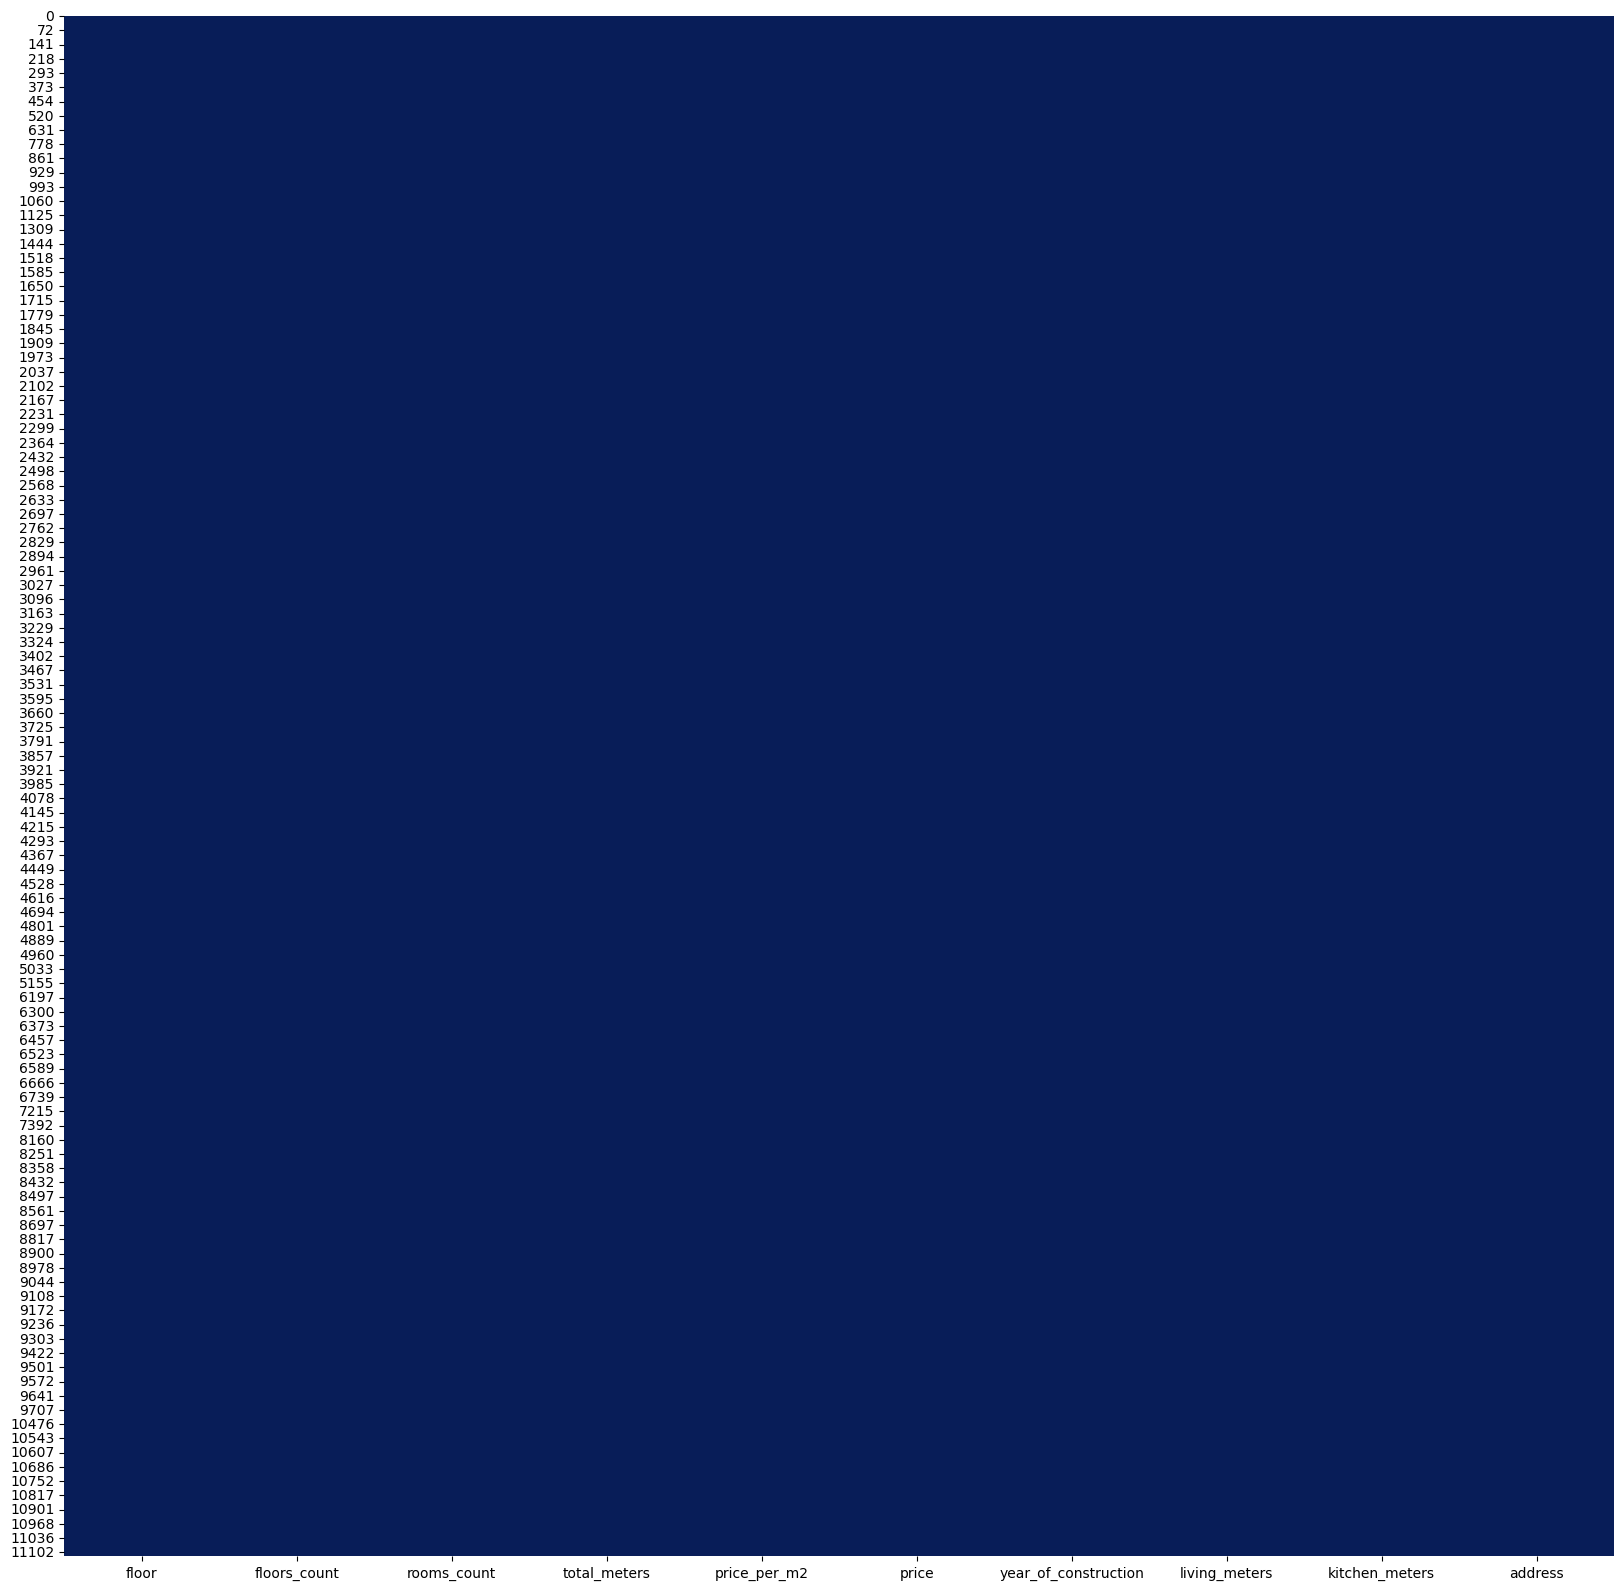

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

In [29]:
df_cop.isna().sum()/df.shape[0]*100

floor                   0.0
floors_count            0.0
rooms_count             0.0
total_meters            0.0
price_per_m2            0.0
price                   0.0
year_of_construction    0.0
living_meters           0.0
kitchen_meters          0.0
address                 0.0
dtype: float64

In [30]:
df_cop.dropna(inplace = True)
df_cop.reset_index(drop = True,inplace = True)
df_cop.head(100)

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,address
0,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,Текстильщики Шкулева Волжская
1,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
2,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники Усачева Спортивная Садовые кварталы
3,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
4,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники Нагатинская набережная Коломенская
5,6,13,1,71.10,983122,69900000,2019,37.1,12.8,Хамовники Усачева Спортивная Садовые кварталы
6,7,9,1,18.00,382000,6876000,-1,-1.0,-1.0,Аэропорт Большой Коптевский проезд Красный Балтиец
7,33,36,1,75.00,626666,47000000,2020,35.0,20.0,Хорошево-Мневники Шелепихинская набережная Шелепиха Сердце Столицы
8,9,17,1,37.20,147072,5471080,2022,-1.0,-1.0,Лухмановская
9,6,41,1,41.00,724390,29700000,2022,24.0,6.0,Хорошевский Ленинградский проспект Аэропорт Прайм Парк


In [31]:
df_cop

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,address
0,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,Текстильщики Шкулева Волжская
1,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
2,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники Усачева Спортивная Садовые кварталы
3,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
4,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники Нагатинская набережная Коломенская
...,...,...,...,...,...,...,...,...,...,...
6925,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский Островитянова Тропарёво
6926,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский проезд Березовой Рощи ЦСКА Гранд-парк
6927,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский 1-й Красногвардейский проезд Тестовская NEVA TOWERS
6928,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье Озерковская набережная Новокузнецкая Bogenhouse


In [32]:
print(df_cop['floor'].unique())
print(df_cop['floors_count'].unique())
print(df_cop['rooms_count'].unique())
print(df_cop['total_meters'].unique())
print(df_cop['price_per_m2'].unique())
print(df_cop['year_of_construction'].unique())
print(df_cop['living_meters'].unique())
print(df_cop['kitchen_meters'].unique())

[ 1 17  5  9 12  6  7 33 16 15 18 24  2  8 34 21 14  4 13 53 20 27 22 25
  3 41 11 10 32 37 31 28 26 19 30 23 29 49 42 36 35 46 63 40 43 55 38 66
 79 44 51 45 -1 92 57 58 78 39 52 62 50 75 67 47 54 48 61 56]
[ 5 41 14 17 13  9 36 21 26 18 24  3 15 16 25 52 22  2 12 27 29 58 48  6
 30 19 53 20 10  8 11  4 37 38  7 28 86 23 35 43 67 33 65 57 32 59 31 44
 51 34 45 39 42 46 50 82 40 75 78 77 79 54 73 47 63 95 64 60 -1 76 69 85
  1 49 87 55 56]
[ 1  2  3  4  5 -1]
[ 1.2000e+01  4.0400e+01  6.1970e+01  4.0500e+01  4.7600e+01  7.1100e+01
  1.8000e+01  7.5000e+01  3.7200e+01  4.1000e+01  4.8000e+01  3.2000e+01
  4.6400e+01  4.2000e+01  3.4000e+01  3.1200e+01  3.3000e+01  2.2100e+01
  3.8300e+01  3.7900e+01  3.8000e+01  4.2200e+01  4.6000e+01  3.6200e+01
  3.6900e+01  1.5110e+01  3.6000e+01  3.9100e+01  3.2500e+01  4.5200e+01
  3.3500e+01  4.7400e+01  4.5000e+01  4.1500e+01  3.8500e+01  3.7500e+01
  2.9000e+01  5.2200e+01  3.7000e+01  3.1100e+01  3.2800e+01  4.0000e+01
  1.9700e+01  2.9200e+01 

# Выбросы

In [33]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = work_val.quantile(0.25)#np.percentile(work_val, 25, method= 'midpoint')
    Q3 = work_val.quantile(0.75)#np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:
            
            up,low = quantiles(df[col])
            df = df[~(df[col] < low) | (df[col] > up)]

    return df.reset_index(drop=True)

In [34]:
df_cop = anti_emmi(df_cop)
df_cop

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,address
0,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
1,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники Усачева Спортивная Садовые кварталы
2,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
3,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники Нагатинская набережная Коломенская
4,6,13,1,71.10,983122,69900000,2019,37.1,12.8,Хамовники Усачева Спортивная Садовые кварталы
...,...,...,...,...,...,...,...,...,...,...
6230,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский Островитянова Тропарёво
6231,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский проезд Березовой Рощи ЦСКА Гранд-парк
6232,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский 1-й Красногвардейский проезд Тестовская NEVA TOWERS
6233,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье Озерковская набережная Новокузнецкая Bogenhouse


In [35]:
df_cop.columns

Index(['floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_m2',
       'price', 'year_of_construction', 'living_meters', 'kitchen_meters',
       'address'],
      dtype='object')

In [36]:
for col in df_cop.drop(columns = 'address').columns:
    print(col)
    print(df_cop[df_cop[col]<0][col].unique())

floor
[-1]
floors_count
[-1]
rooms_count
[-1]
total_meters
[]
price_per_m2
[]
price
[]
year_of_construction
[]
living_meters
[-1.]
kitchen_meters
[-1.]


In [37]:
(df_cop[df_cop != -1]['living_meters'].sum()/df_cop[df_cop != -1]['living_meters'].count()).round()

58.0

In [38]:
for col in df_cop.drop(columns = ['address','year_of_construction']).columns:
    df_cop.loc[df_cop[col] == -1,col] = (df_cop[df_cop != -1][col].sum()//df_cop[df_cop != -1][col].count())

In [39]:
df_cop.loc[df_cop[col] == -1,'year_of_construction'] = df_cop['year_of_construction'].mode()

In [40]:
df_cop

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,address
0,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
1,5,14,1,61.97,919799,57000000,2022,58.0,14.0,Хамовники Усачева Спортивная Садовые кварталы
2,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский Ленинградский проспект Аэропорт Прайм Парк
3,12,17,1,47.60,324579,15450000,2019,58.0,10.0,Нагатино-Садовники Нагатинская набережная Коломенская
4,6,13,1,71.10,983122,69900000,2019,37.1,12.8,Хамовники Усачева Спортивная Садовые кварталы
...,...,...,...,...,...,...,...,...,...,...
6230,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский Островитянова Тропарёво
6231,11,17,4,172.63,434455,74999999,2008,58.0,14.0,Хорошевский проезд Березовой Рощи ЦСКА Гранд-парк
6232,37,78,2,73.00,602739,44000000,2020,58.0,14.0,Пресненский 1-й Красногвардейский проезд Тестовская NEVA TOWERS
6233,3,5,2,42.00,892142,37470000,2021,58.0,14.0,Замоскворечье Озерковская набережная Новокузнецкая Bogenhouse


In [41]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6235 entries, 0 to 6234
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor                 6235 non-null   int64  
 1   floors_count          6235 non-null   int64  
 2   rooms_count           6235 non-null   int64  
 3   total_meters          6235 non-null   float64
 4   price_per_m2          6235 non-null   int64  
 5   price                 6235 non-null   int64  
 6   year_of_construction  6235 non-null   int64  
 7   living_meters         6235 non-null   float64
 8   kitchen_meters        6235 non-null   float64
 9   address               6235 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 487.2+ KB


<Axes: >

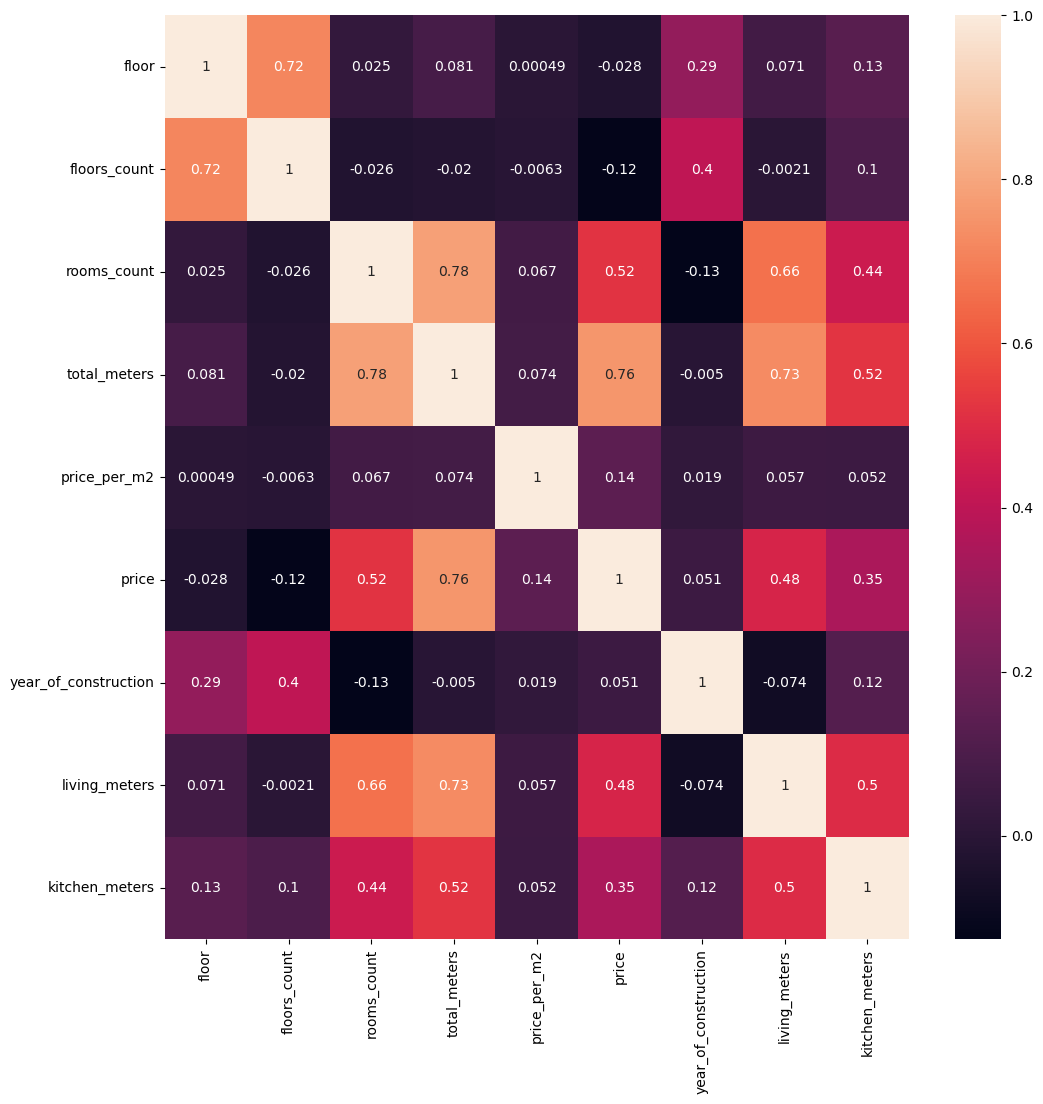

In [42]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.drop(columns = 'address').corr(),annot = True)

In [43]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    #if len(tokens) > 2:
    return tokens
    #return None

In [44]:
df_cop['address'] = df_cop['address'].apply(lemmatize)

In [45]:
df_cop['address']

0              [хорошевский, ленинградский, проспект, аэропорт, прайма, парк]
1                            [хамовник, усачёв, спортивный, садовый, квартал]
2              [хорошевский, ленинградский, проспект, аэропорт, прайма, парк]
3                  [нагатино, садовник, нагатинский, набережная, коломенский]
4                            [хамовник, усачёв, спортивный, садовый, квартал]
                                        ...                                  
6230                                   [обручевский, островитянов, тропарёво]
6231                [хорошевский, проезд, берёзовый, роща, цска, гранд, парк]
6232    [пресненский, й, красногвардейский, проезд, тестовский, neva, towers]
6233      [замоскворечье, озерковский, набережная, новокузнецкий, bogenhouse]
6234                     [пресненский, мантулинский, выставочный, city, park]
Name: address, Length: 6235, dtype: object

In [ ]:
# def nexte(listik):
#     new_listik = []
#     listik = map(letters, listik)
#     for word in listik:
#         new_listik.append(word)
#     return new_listik
# def letters(word):
#     if len(word)<4:
#         word = ''
#     return word
 
# df_cop['address'] = df_cop['address'].apply(nexte)
# df_cop['address']

In [46]:
def concat(text):
    text= ' '.join(text)
    return text

In [47]:
df_cop['address'] = df_cop['address'].apply(concat)

In [48]:
df_cop['address']

0             хорошевский ленинградский проспект аэропорт прайма парк
1                          хамовник усачёв спортивный садовый квартал
2             хорошевский ленинградский проспект аэропорт прайма парк
3                нагатино садовник нагатинский набережная коломенский
4                          хамовник усачёв спортивный садовый квартал
                                    ...                              
6230                               обручевский островитянов тропарёво
6231                хорошевский проезд берёзовый роща цска гранд парк
6232    пресненский й красногвардейский проезд тестовский neva towers
6233    замоскворечье озерковский набережная новокузнецкий bogenhouse
6234                   пресненский мантулинский выставочный city park
Name: address, Length: 6235, dtype: object

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_cop['address'])
X_counts.shape

(6235, 1722)

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_counts)
X_tfidf = tf_transformer.transform(X_counts)
X_tfidf.shape

(6235, 1722)

In [51]:
X_plus = X_tfidf.toarray()

# Модели

In [52]:
type(X_plus)

numpy.ndarray

In [53]:
# from sklearn.decomposition import TruncatedSVD
# clf = TruncatedSVD(5)
# Xpca = clf.fit_transform(X_tfidf)
# Xpca

In [54]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X = scaler.fit_transform(df_cop.drop(columns = ['address','price','total_meters']))
# X

In [55]:
X = np.append(X_plus,df_cop.drop(columns = ['address','price','total_meters']), axis=1)
y = df_cop['price_per_m2']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [59]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.5, depth=5, loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)


0:	learn: 222165.1533387	total: 5.79ms	remaining: 5.78s
1:	learn: 175224.8026085	total: 11.4ms	remaining: 5.67s
2:	learn: 141804.0876217	total: 17.1ms	remaining: 5.67s
3:	learn: 116785.8166437	total: 22.3ms	remaining: 5.56s
4:	learn: 99015.9531951	total: 27.4ms	remaining: 5.45s
5:	learn: 88976.7287592	total: 32.4ms	remaining: 5.37s
6:	learn: 80266.3069739	total: 37.6ms	remaining: 5.33s
7:	learn: 74196.3151867	total: 42.8ms	remaining: 5.31s
8:	learn: 73737.2247613	total: 48.2ms	remaining: 5.3s
9:	learn: 70667.3188503	total: 53.1ms	remaining: 5.26s
10:	learn: 68039.9727873	total: 58.3ms	remaining: 5.24s
11:	learn: 66667.8040656	total: 63.6ms	remaining: 5.23s
12:	learn: 65128.1732255	total: 68.5ms	remaining: 5.2s
13:	learn: 42940.1704583	total: 73.4ms	remaining: 5.17s
14:	learn: 42540.8203644	total: 78.6ms	remaining: 5.16s
15:	learn: 42454.7772272	total: 83.7ms	remaining: 5.15s
16:	learn: 41331.5990376	total: 89ms	remaining: 5.14s
17:	learn: 40123.9656847	total: 94.1ms	remaining: 5.13s
18

152:	learn: 27989.5089900	total: 823ms	remaining: 4.55s
153:	learn: 27974.5374742	total: 829ms	remaining: 4.55s
154:	learn: 27973.4647853	total: 835ms	remaining: 4.55s
155:	learn: 27948.2286801	total: 841ms	remaining: 4.55s
156:	learn: 27947.6296909	total: 846ms	remaining: 4.54s
157:	learn: 27944.1530774	total: 851ms	remaining: 4.53s
158:	learn: 27939.6587331	total: 857ms	remaining: 4.53s
159:	learn: 27930.1422896	total: 862ms	remaining: 4.53s
160:	learn: 27924.3412717	total: 868ms	remaining: 4.52s
161:	learn: 27893.9927578	total: 873ms	remaining: 4.52s
162:	learn: 27892.0159804	total: 879ms	remaining: 4.51s
163:	learn: 27890.0928262	total: 884ms	remaining: 4.51s
164:	learn: 27888.0899991	total: 890ms	remaining: 4.5s
165:	learn: 27884.5995088	total: 895ms	remaining: 4.5s
166:	learn: 27882.2337268	total: 902ms	remaining: 4.5s
167:	learn: 27879.8907585	total: 908ms	remaining: 4.5s
168:	learn: 27879.0800577	total: 913ms	remaining: 4.49s
169:	learn: 27850.9846454	total: 918ms	remaining: 4.

302:	learn: 26852.0842588	total: 1.63s	remaining: 3.74s
303:	learn: 26815.3939885	total: 1.63s	remaining: 3.74s
304:	learn: 26810.4160980	total: 1.64s	remaining: 3.73s
305:	learn: 26809.2965123	total: 1.64s	remaining: 3.73s
306:	learn: 26806.6954010	total: 1.65s	remaining: 3.72s
307:	learn: 26803.3365127	total: 1.65s	remaining: 3.72s
308:	learn: 26784.0495817	total: 1.66s	remaining: 3.71s
309:	learn: 26780.3336130	total: 1.66s	remaining: 3.7s
310:	learn: 26772.8959053	total: 1.67s	remaining: 3.7s
311:	learn: 26771.6770891	total: 1.67s	remaining: 3.69s
312:	learn: 26768.3751228	total: 1.68s	remaining: 3.69s
313:	learn: 26766.8376887	total: 1.69s	remaining: 3.68s
314:	learn: 26740.8861193	total: 1.69s	remaining: 3.68s
315:	learn: 26736.2306155	total: 1.7s	remaining: 3.67s
316:	learn: 26735.7873223	total: 1.7s	remaining: 3.67s
317:	learn: 26732.7488473	total: 1.71s	remaining: 3.66s
318:	learn: 26709.2113946	total: 1.71s	remaining: 3.65s
319:	learn: 26705.1449373	total: 1.72s	remaining: 3.

452:	learn: 15417.4912200	total: 2.44s	remaining: 2.95s
453:	learn: 15416.8440615	total: 2.45s	remaining: 2.94s
454:	learn: 15416.5287809	total: 2.45s	remaining: 2.94s
455:	learn: 15415.5824974	total: 2.46s	remaining: 2.94s
456:	learn: 15415.3347069	total: 2.47s	remaining: 2.93s
457:	learn: 15414.7191610	total: 2.47s	remaining: 2.92s
458:	learn: 15410.9742929	total: 2.48s	remaining: 2.92s
459:	learn: 15397.9613613	total: 2.48s	remaining: 2.91s
460:	learn: 15392.7923937	total: 2.49s	remaining: 2.91s
461:	learn: 15359.5924374	total: 2.49s	remaining: 2.9s
462:	learn: 15329.3112691	total: 2.5s	remaining: 2.9s
463:	learn: 15304.9257273	total: 2.5s	remaining: 2.89s
464:	learn: 15297.5268592	total: 2.51s	remaining: 2.89s
465:	learn: 15296.2332916	total: 2.52s	remaining: 2.88s
466:	learn: 15294.7367329	total: 2.52s	remaining: 2.88s
467:	learn: 15286.4332099	total: 2.53s	remaining: 2.87s
468:	learn: 15285.9920674	total: 2.53s	remaining: 2.87s
469:	learn: 15258.1835293	total: 2.54s	remaining: 2.

600:	learn: 14848.0197582	total: 3.25s	remaining: 2.15s
601:	learn: 14847.6952453	total: 3.25s	remaining: 2.15s
602:	learn: 14847.1531684	total: 3.26s	remaining: 2.15s
603:	learn: 14845.6977169	total: 3.26s	remaining: 2.14s
604:	learn: 14845.3273929	total: 3.27s	remaining: 2.13s
605:	learn: 14844.4754837	total: 3.27s	remaining: 2.13s
606:	learn: 14844.4206302	total: 3.28s	remaining: 2.12s
607:	learn: 14843.8631605	total: 3.29s	remaining: 2.12s
608:	learn: 14843.7343252	total: 3.29s	remaining: 2.11s
609:	learn: 14843.5591642	total: 3.3s	remaining: 2.11s
610:	learn: 14843.1606885	total: 3.3s	remaining: 2.1s
611:	learn: 14842.5395960	total: 3.31s	remaining: 2.1s
612:	learn: 14818.2320400	total: 3.31s	remaining: 2.09s
613:	learn: 14811.5752962	total: 3.32s	remaining: 2.08s
614:	learn: 14811.0547060	total: 3.32s	remaining: 2.08s
615:	learn: 14810.4339969	total: 3.33s	remaining: 2.07s
616:	learn: 14809.9444311	total: 3.33s	remaining: 2.07s
617:	learn: 14809.5485009	total: 3.34s	remaining: 2.

749:	learn: 14472.6758721	total: 4.05s	remaining: 1.35s
750:	learn: 14472.6203719	total: 4.05s	remaining: 1.34s
751:	learn: 14472.4741907	total: 4.06s	remaining: 1.34s
752:	learn: 14471.4919184	total: 4.07s	remaining: 1.33s
753:	learn: 14470.2572777	total: 4.07s	remaining: 1.33s
754:	learn: 14469.1712347	total: 4.08s	remaining: 1.32s
755:	learn: 14468.3921602	total: 4.08s	remaining: 1.32s
756:	learn: 14466.1652636	total: 4.09s	remaining: 1.31s
757:	learn: 14465.0678367	total: 4.09s	remaining: 1.31s
758:	learn: 14464.4153084	total: 4.1s	remaining: 1.3s
759:	learn: 14464.0237361	total: 4.1s	remaining: 1.3s
760:	learn: 14462.7418640	total: 4.11s	remaining: 1.29s
761:	learn: 14462.5643629	total: 4.12s	remaining: 1.28s
762:	learn: 14461.9803610	total: 4.12s	remaining: 1.28s
763:	learn: 14461.3481318	total: 4.13s	remaining: 1.27s
764:	learn: 14459.6962723	total: 4.13s	remaining: 1.27s
765:	learn: 14458.7789213	total: 4.14s	remaining: 1.26s
766:	learn: 14458.6317628	total: 4.14s	remaining: 1.

900:	learn: 9041.4655368	total: 4.87s	remaining: 535ms
901:	learn: 9038.9522588	total: 4.88s	remaining: 530ms
902:	learn: 9038.8491685	total: 4.88s	remaining: 524ms
903:	learn: 9036.9386758	total: 4.89s	remaining: 519ms
904:	learn: 9036.6083378	total: 4.89s	remaining: 514ms
905:	learn: 9035.3782005	total: 4.9s	remaining: 508ms
906:	learn: 9035.1279274	total: 4.9s	remaining: 503ms
907:	learn: 9019.5678797	total: 4.91s	remaining: 497ms
908:	learn: 9018.8285814	total: 4.91s	remaining: 492ms
909:	learn: 9018.7284086	total: 4.92s	remaining: 486ms
910:	learn: 9018.4249072	total: 4.92s	remaining: 481ms
911:	learn: 9017.8486965	total: 4.93s	remaining: 476ms
912:	learn: 9017.7657453	total: 4.93s	remaining: 470ms
913:	learn: 9017.7194693	total: 4.94s	remaining: 465ms
914:	learn: 9017.4266118	total: 4.94s	remaining: 459ms
915:	learn: 9017.2458296	total: 4.95s	remaining: 454ms
916:	learn: 9016.2086979	total: 4.96s	remaining: 448ms
917:	learn: 9015.9503078	total: 4.96s	remaining: 443ms
918:	learn: 

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

8004.638612051062

In [61]:
import joblib
joblib.dump(fit_model_price_m2, "price_m2_8-9.joblib")

['price_m2_8-9.joblib']

In [62]:
X = np.append(X_plus,df_cop.drop(columns = ['address','price','total_meters']), axis=1)
y = df_cop['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [78]:
model = CatBoostRegressor(learning_rate=0.2, depth=7, loss_function='MAE',verbose=False)
fit_model_price = model.fit(X_train, y_train)

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price.predict(X_test))

11711710.346950991

In [86]:
from catboost import Pool, cv
params = {"iterations": 1001,
          "depth": 3,
          "loss_function": "MAE",
          "verbose": False,
          "learning_rate": 0.5,
          "eval_metric": "MAE"}
cv_dataset = Pool(data=X_train,
                  label=y_train)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 15605611.95
bestIteration = 463

Training on fold [1/2]

bestTest = 14101358.25
bestIteration = 448



In [90]:
X = np.append(X_plus,df_cop.drop(columns = ['address','price','total_meters']), axis=1)
y = df_cop['total_meters']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [102]:
from catboost import Pool, cv
params = {"iterations": 1001,
          "depth": 6,
          "loss_function": "MAE",
          "verbose": False,
          "learning_rate": 0.5,
          "eval_metric": "MAE"}
cv_dataset = Pool(data=X_train,
                  label=y_train)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 18.59139551
bestIteration = 311

Training on fold [1/2]

bestTest = 18.05335636
bestIteration = 102



In [92]:
df_cop.describe()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters
count,6235.000000,6235.000000,6235.000000,6235.000000,6.235000e+03,6.235000e+03,6235.000000,6235.000000,6235.000000
mean,9.178990,17.415397,3.006255,107.561481,5.280821e+05,7.036006e+07,2000.273617,58.166752,14.088308
std,8.590254,12.345809,1.444001,80.224464,2.283440e+06,1.044957e+08,28.308900,40.359203,7.891047
min,1.000000,2.000000,1.000000,0.101000,5.971800e+04,2.000000e+06,1902.000000,3.000000,1.000000
25%,3.000000,9.000000,2.000000,44.000000,2.550250e+05,1.170000e+07,1996.000000,30.000000,9.300000
50%,6.000000,15.000000,3.000000,86.000000,3.706290e+05,3.100000e+07,2012.000000,58.000000,14.000000
75%,12.000000,23.000000,4.000000,150.000000,6.008325e+05,8.200000e+07,2020.000000,64.000000,15.600000
max,92.000000,95.000000,5.000000,885.000000,1.782178e+08,1.650000e+09,2024.000000,680.000000,99.000000


In [ ]:
total_meters минимальное - 0.1
year_of_construction - 2024